In [15]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Get dataset
dataset_credit_scoring = pd.read_csv('credit_scoring.csv')

In [3]:
# Mengganti data menjadi nilai diskrit
dataset_credit_scoring['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0], inplace=True)
dataset_credit_scoring['rata_rata_overdue'].replace({'0 - 30 days':1, '31 - 45 days':2, '46 - 60 days':3, '61 - 90 days':4, '> 90 days':5}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5500\3251486116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_credit_scoring['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_5500\3251486116.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [9]:

# Membuat nilai asal (X) dan target (Y)
y = dataset_credit_scoring['risk_rating'].values
X = dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue', 'durasi_pinjaman_bulan']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X = dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue']).values
y = dataset_credit_scoring['risk_rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

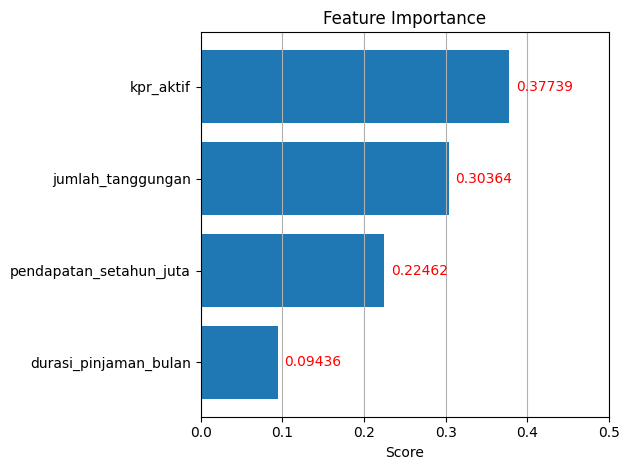

In [11]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
model = rfc.fit(X_train, y_train)
importance = model.feature_importances_
feature_names = dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue']).columns

#Buat data frame
fi_df = pd.DataFrame({'Feature': feature_names, 'Score': importance}).sort_values('Score')

#Buat grafik
import matplotlib.pyplot as plt
barh = plt.barh(fi_df['Feature'], fi_df['Score'])
plt.bar_label(barh, fmt='%.5f', padding=5, c='red')
plt.title('Feature Importance')
plt.xlabel('Score')
plt.xlim([0, 0.5])
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [12]:
#Feature matrix X1
X1 = dataset_credit_scoring.drop(columns=['kode_kontrak', 'risk_rating', 'rata_rata_overdue', 'durasi_pinjaman_bulan']).values

#membagi data training dan data testing, dimana training 70% dan testing 30%
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

In [18]:
# Mengatur hyperparameter tunning
grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat pemodelan Random Forest
rf_model = RandomForestClassifier(criterion='entropy', random_state=42)
# Mencari nilai terbaik dengan grid search CV
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [19]:
# Mengatur hyperparameter tunning
n_estimators = list(np.linspace(200, 2000, num=100, dtype=np.int32))
max_features = ['auto', 'sqrt']
max_depth = list(np.linspace(10, 110, num=11, dtype=np.int32))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Membuat pemodelan Random Forest
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
# Mencari nilai terbaik dengan random search CV
rf_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, n_iter=10, cv=3, verbose=0, random_state=0)
rf_random.fit(X_train, y_train)

c:\Users\Asus\Documents\portofolio_dqlab\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\Documents\portofolio_dqlab\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\Documents\portofolio_dqlab\sklearn-env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\Documents\portofolio_dqlab\sklearn-env\Lib\site-packages\sklearn\base.py", line 66

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [np.int32(10),
                                                      np.int32(20),
                                                      np.int32(30),
                                                      np.int32(40),
                                                      np.int32(50),
                                                      np.int32(60),
                                                      np.int32(70),
                                                      np.int32(80),
                                                      np.int32(90),
                                                      np.int32(100),
                                                      np.int32(110), None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_le...
                                                         np.int32(309),
                                                         np.int32(327),
                                                         np.int32(345),
                                                         np.int32(363),
                                                         np.int32(381),
                                                         np.int32(400),
                                                         np.int32(418),
                                                         np.int32(436),
                                                         np.int32(454),
                                                         np.int32(472),
                                                         np.int32(490),
                                                         np.int32(509),
                                                         np.int32(527),
                                                         np.int32(545),
                                                         np.int32(563),
                                                         np.int32(581),
                                                         np.int32(600),
                                                         np.int32(618),
                                                         np.int32(636),
                                                         np.int32(654),
                                                         np.int32(672),
                                                         np.int32(690),
                                                         np.int32(709),
                                                         np.int32(727), ...]},
                   random_state=0)

In [21]:
# Fungsi mengevaluasi model berdasarkan data testing
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: %.4f degrees.' % (np.mean(errors),))
    print('Accuracy = %.2f%%.' % (accuracy,))
    
#Base Model
rfc = RandomForestClassifier()
base_model = rfc.fit(X_train, y_train)
print('Base Model:')
print('-----------')
evaluate(base_model, X_test, y_test)

#Grid Model
grid_model = grid_search.best_estimator_
print('\n\nGrid Model:')
print('-----------')
evaluate(grid_model, X_test, y_test)

#Random Model
random_model = rf_random.best_estimator_
print('\n\nRandom Model:')
print('-----------')
evaluate(random_model, X_test, y_test)

Base Model:
-----------
Model Performance
Average Error: 0.2481 degrees.
Accuracy = 87.20%.


Grid Model:
-----------
Model Performance
Average Error: 0.2333 degrees.
Accuracy = 87.38%.


Random Model:
-----------
Model Performance
Average Error: 0.2148 degrees.
Accuracy = 88.23%.
